In [14]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
#importing dataset
data = pd.read_csv("../datasets/BodyPerformance.csv")
data.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,24.0,F,152.4,42.5,23.4,57.0,112.0,27.4,14.2,50.0,184.0,C
1,27.0,F,162.1,70.9,35.7,97.0,148.0,30.6,11.0,42.0,157.0,D
2,23.0,M,173.7,68.3,13.6,76.0,137.0,47.7,16.5,48.0,208.0,C
3,31.0,M,168.2,70.5,15.5,82.0,145.0,39.6,19.9,66.0,264.0,C
4,25.0,M,175.1,64.8,6.9,65.0,118.0,42.0,19.8,49.0,252.0,B


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7015 entries, 0 to 7014
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      7015 non-null   float64
 1   gender                   7015 non-null   object 
 2   height_cm                7015 non-null   float64
 3   weight_kg                7015 non-null   float64
 4   body fat_%               7015 non-null   float64
 5   diastolic                7015 non-null   float64
 6   systolic                 7015 non-null   float64
 7   gripForce                7015 non-null   float64
 8   sit and bend forward_cm  7015 non-null   float64
 9   sit-ups counts           7015 non-null   float64
 10  broad jump_cm            7015 non-null   float64
 11  class                    7015 non-null   object 
dtypes: float64(10), object(2)
memory usage: 657.8+ KB


In [17]:
data.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000,7015.000000
mean,36.801283,168.751732,67.046887,22.642606,78.648952,130.364490,37.289624,15.790925,40.614597,191.824391
std,13.649180,8.256259,11.242355,6.796773,10.675237,14.538937,10.443406,6.973073,13.075697,38.528746
min,21.000000,125.000000,34.400000,3.500000,6.000000,43.900000,0.000000,-20.000000,0.000000,0.000000
25%,25.000000,162.900000,58.500000,17.800000,71.000000,120.000000,27.800000,11.800000,32.000000,163.000000
50%,32.000000,169.400000,67.400000,22.200000,79.000000,130.000000,38.700000,16.000000,42.000000,195.000000
75%,48.000000,174.700000,74.700000,27.100000,86.000000,141.000000,45.200000,20.000000,50.000000,222.000000
max,64.000000,193.800000,125.700000,54.900000,156.200000,193.000000,69.900000,213.000000,78.000000,295.000000


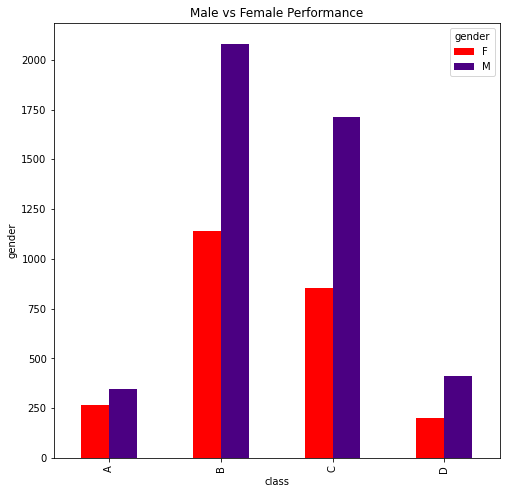

In [29]:
#Male vs Female performance
plot = data.groupby(["class", "gender"]).size().unstack(level=1).plot(kind="bar", figsize=(
    8, 8), ylabel="gender", color=["red", "indigo"], title="Male vs Female Performance")

# saving image
fig = plot.get_figure()
fig.savefig("../visualizations/Male_Female_Performance.jpg")

In [30]:
#converting group and class column to numeric
def change_col_cat(df,col_name):
    df[col_name] = pd.Categorical(df[col_name])
    df[col_name+"_cat"] = df[col_name].cat.codes
    df.drop(columns=[col_name],inplace=True)

In [31]:
cat_columns=["gender","class"] #categorical columns
for cat in cat_columns:
    change_col_cat(data,cat)
    
data

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,gender_cat,class_cat
0,24.0,152.4,42.5,23.4,57.0,112.0,27.4,14.2,50.0,184.0,0,2
1,27.0,162.1,70.9,35.7,97.0,148.0,30.6,11.0,42.0,157.0,0,3
2,23.0,173.7,68.3,13.6,76.0,137.0,47.7,16.5,48.0,208.0,1,2
3,31.0,168.2,70.5,15.5,82.0,145.0,39.6,19.9,66.0,264.0,1,2
4,25.0,175.1,64.8,6.9,65.0,118.0,42.0,19.8,49.0,252.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7010,21.0,179.6,78.6,16.3,64.0,118.0,54.1,25.9,58.0,248.0,1,1
7011,56.0,166.8,64.0,21.4,75.0,132.0,50.7,13.0,36.0,197.0,1,1
7012,26.0,177.4,78.3,14.0,74.0,115.0,53.3,15.3,63.0,234.0,1,0
7013,49.0,177.2,83.0,19.7,98.0,158.0,40.2,14.9,50.0,203.0,1,2


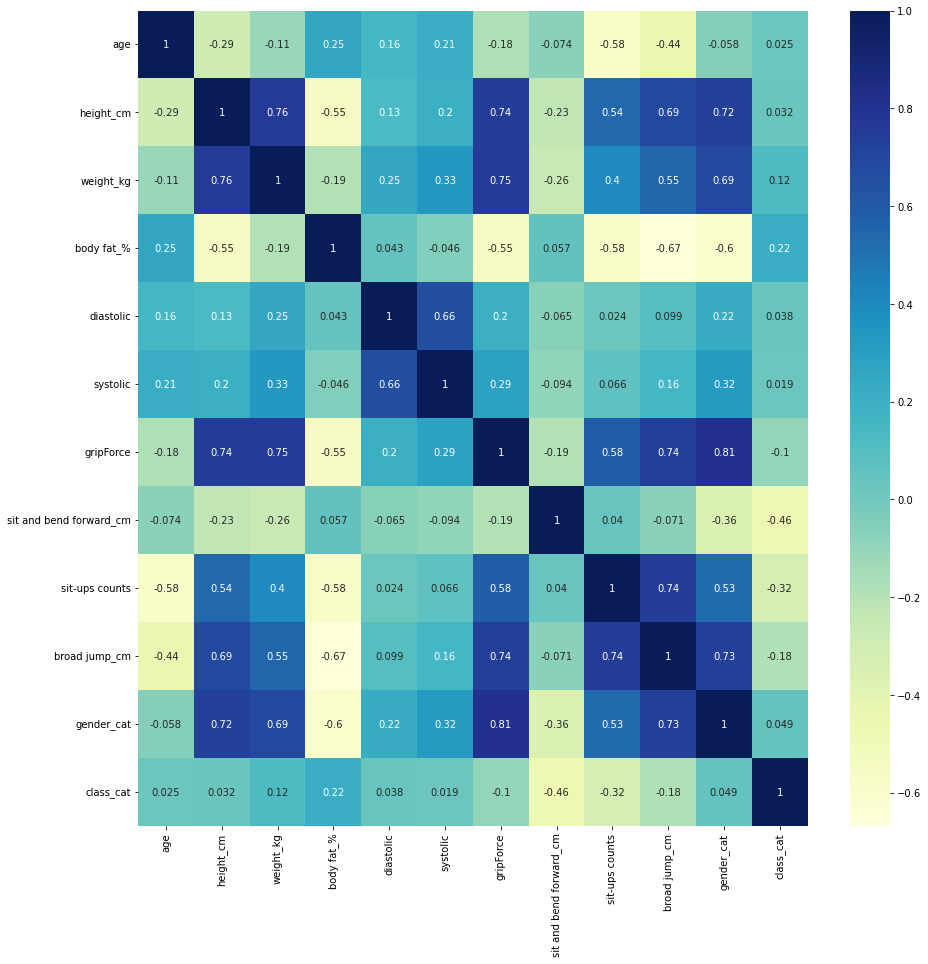

In [41]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True, ax=ax)
fig.savefig("../visualizations/Correlation_Heatmap.jpg")


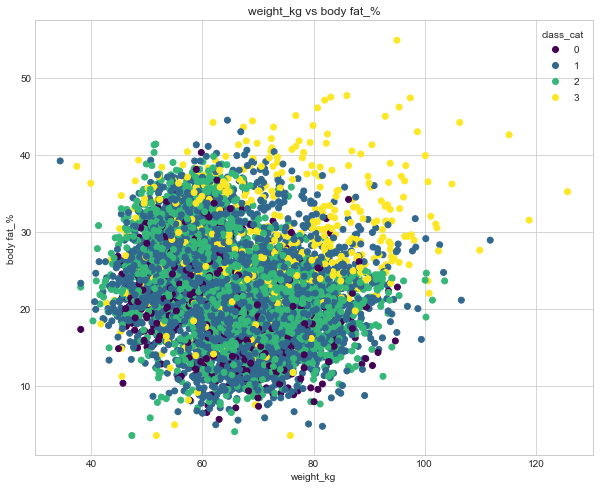

In [46]:
plt.style.use("seaborn-whitegrid")
def plot_scatter(df,col1,col2,target,cmap="viridis"):
    fig, ax = plt.subplots(figsize=(10,8))
    scatter = ax.scatter(df[col1],df[col2],c=df[target],cmap=cmap)
    ax.legend(*scatter.legend_elements(),title=target)
    ax.set(title=col1+" vs "+col2,
          xlabel=col1,
          ylabel=col2);
    return fig, ax
    
fig, ax = plot_scatter(data,"weight_kg","body fat_%","class_cat")
fig.savefig("../visualizations/Weight_BodyFat_Class.jpg")

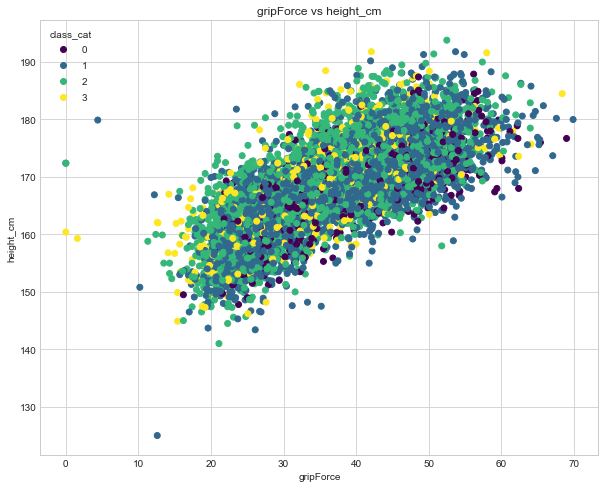

In [48]:
fig, ax = plot_scatter(data,"gripForce","height_cm","class_cat")
fig.savefig("../visualizations/GripForce_Height_Class.jpg")

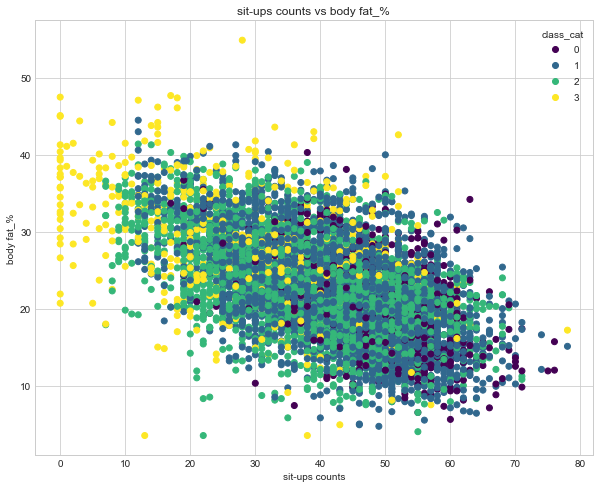

In [49]:
fig, ax = plot_scatter(data,"sit-ups counts","body fat_%","class_cat")
fig.savefig("../visualizations/Situps_BodyFat_Class.jpg")

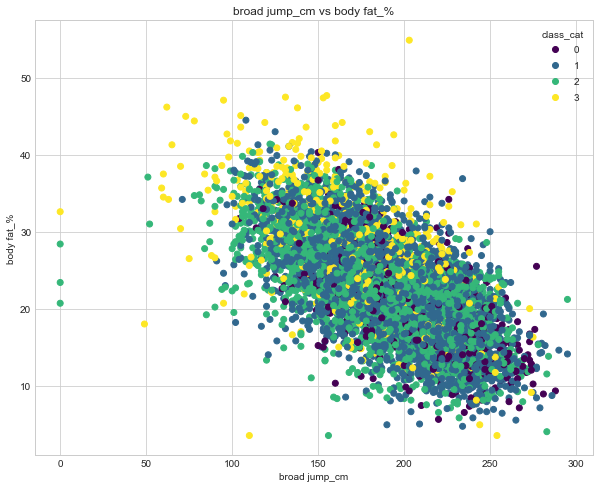

In [50]:
fig, ax = plot_scatter(data,"broad jump_cm","body fat_%","class_cat")
fig.savefig("../visualizations/BroadJump_BodyFat_Class.jpg")

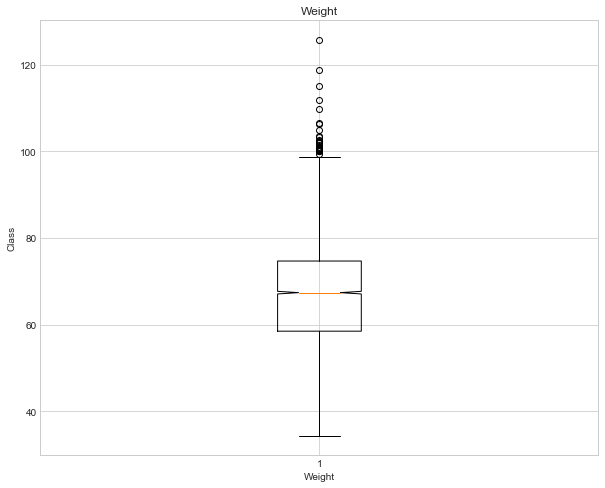

In [53]:
fig, ax = plt.subplots(figsize=(10,8))
ax.boxplot(data["weight_kg"],notch=True)
ax.set(title="Weight",xlabel="Weight",ylabel="Class")
fig.savefig("../visualizations/Weight_Boxplot.jpg")

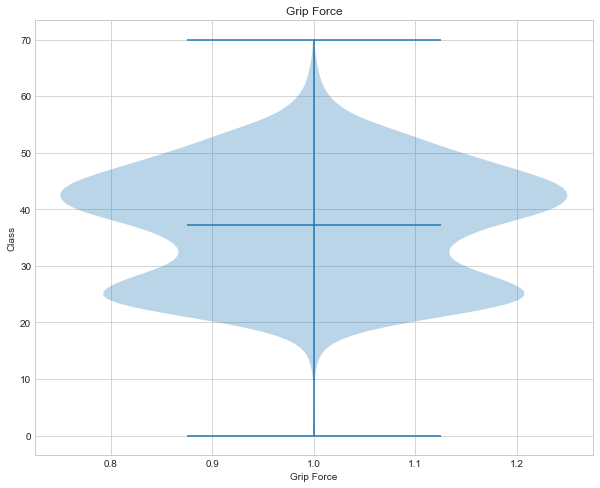

In [54]:
fig, ax = plt.subplots(figsize=(10,8))
ax.violinplot(data["gripForce"],showmeans=True)
ax.set(title="Grip Force",xlabel="Grip Force",ylabel="Class")
fig.savefig("../visualizations/GripForce_Violinplot.jpg")

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

X = data.drop(columns=["class_cat"])
y = data["class_cat"]

scale_columns = ["age","height_cm","weight_kg","body fat_%",
              "diastolic","systolic","gripForce","sit and bend forward_cm",
              "sit-ups counts","broad jump_cm"]
scaler = StandardScaler()
transformer = ColumnTransformer([
    ("scaler",scaler,scale_columns)
])
transform_X = transformer.fit_transform(X)
transform_X

array([[-0.93794613, -1.98066665, -2.18358485, ..., -0.22816894,
         0.71782573, -0.20309377],
       [-0.71813704, -0.80571671,  0.34275629, ..., -0.68710982,
         0.10596005, -0.9039192 ],
       [-1.01121583,  0.59937806,  0.11147154, ...,  0.10169482,
         0.56485931,  0.41986216],
       ...,
       [-0.79140674,  1.04755484,  1.00102828, ..., -0.07040801,
         1.71210747,  1.09473109],
       [ 0.89379631,  1.02332907,  1.41911995, ..., -0.12777562,
         0.71782573,  0.29007967],
       [ 0.45417812, -0.87839403, -1.52531286, ...,  0.10169482,
        -1.34722096, -1.18944067]])

In [56]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(transform_X,y,test_size=0.2)

In [57]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.ensemble import RandomForestClassifier

clf = OneVsOneClassifier(RandomForestClassifier())
clf.fit(X_train,y_train)

OneVsOneClassifier(estimator=RandomForestClassifier())

In [58]:
clf.score(X_test,y_test)

0.7284390591589451

In [59]:
y_preds = clf.predict(X_test)
y_preds[:10]

array([2, 1, 2, 1, 3, 1, 1, 2, 2, 1], dtype=int8)

In [60]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [61]:
print("Accuracy Score: ",accuracy_score(y_test,y_preds))

Accuracy Score:  0.7284390591589451


In [62]:
print(confusion_matrix(y_test,y_preds))

[[ 35  96   3   0]
 [ 15 554  47   2]
 [  5 168 346   4]
 [  0  16  25  87]]


In [63]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.64      0.26      0.37       134
           1       0.66      0.90      0.76       618
           2       0.82      0.66      0.73       523
           3       0.94      0.68      0.79       128

    accuracy                           0.73      1403
   macro avg       0.76      0.62      0.66      1403
weighted avg       0.75      0.73      0.72      1403



In [66]:
# save model in models folder
import pickle
filename = "../ml/model/model.pkl"
pickle.dump(clf,open(filename,"wb"))

In [68]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.7284390591589451
